In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from dev_interaction_util import *
from DevCvAnalysis import DevCvAnalysis

In [4]:
config = load_config("config.yml") 

dropbox_data_dir = config['dropbox_data_dir']


The basic structure is the following:

1. Run the following cross-validated analyses:
   1. Predicting change by condition only
   2. Predicting change by condition and neural and behavioral measures
   3. Predicting change by condition, neural and behavioral measures, and their interactions
2. Measure the predictivity of the three models above using anova
3. Repeat the steps above separately for three outcome variables, change in: FFQ, ASA-24, and BFP
4. 

Tasks to do to get this job done (not in order):

1. Write the analysis pipeline above
2. Get the neural data
3. Get the behavioral data


We have the behavioral data. Do we have the neural data already?

What could we delegate here? Behavioral data we already have. We have mostly writen the analysis pipeline. The neural data could be passed on.

# Get the data

## Set up data


In [5]:
%load_ext autoreload
%autoreload 2

from InterventionCVManager import *

dropbox_data_dir = config['dropbox_data_dir']

icvm = InterventionCVManager(dropbox_data_dir)
#icvm.mode = 'full_pipeline_test'
#icvm.mode = 'fast_pipeline_test'
icvm.mode = 'full_analysis'

#dev_cv_analysis = icvm.get_prepopulated_dev_cv_analysis(set_as_random=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%load_ext autoreload
%autoreload 2
dev_cv_analysis = icvm.get_prepopulated_dev_cv_analysis(set_as_random=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/benjaminsmith/Google Drive/oregon/code/DEV_scripts/analyses/intervention_moderation/dev_interaction_util.py:1003: FutureWarning: The default value of regex will change from True to False in a future version.
  ms_groups['intervention_group'] = ms_groups['group_raw'].str.replace(r"\(.*\)","")


pre merge: 275
post merge: 270
participants in pre merge but not post merge: {'DEV280', 'DEV007', 'DEV032', 'DEV002', 'DEV022'}
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'run', 'task'],
      dtype='object')
Index(['Unnamed: 0', 'subject_id', 'wave', 'spm_l2_path', 'condition',
       'beta_name', 'mask_label', 'roi_activity', 'task', 'run'],
      dtype='object')
run_real_analysis is True, so we're not randomizing the outcomes. 
(243, 33)
(243, 33)


# Predict change

### Set up sets of variables to run

First, we set up a function that loops runs the scoring loop above (which does one cross-validation analysis), and the nadditionally:
- selects the best model based on the overall results
- Runs a final fit
- presents model results

Now, we include functions that compare models with and without individual differences and interactions.

Should manually verify that in the following list, the intervention_group allocations are randomized (if we're running a test run) or that they are accurate (if it's not a test run).

In [7]:
pd.concat([
    dev_cv_analysis.outcome_measures['SID'],
      dev_cv_analysis.group_assignments
],axis=1)

,SID,intervention_group
0,DEV004,umpqua
1,DEV005,umpqua
2,DEV008,umpqua
3,DEV009,umpqua
4,DEV010,mckenzie
...,...,...
238,DEV308,willamette
239,DEV309,umpqua
240,DEV310,mckenzie
241,DEV311,willamette


In [8]:
dev_cv_analysis.outcome_measures.columns

Index(['SID', 'bf', 'NUTRIENT_RICH_FOODS_INDEX_2wkAverage',
       'ANTINUTRIENT_DENSITY_2wkAverage', 'total_calorie'],
      dtype='object')

In [9]:
condition_cols = dev_cv_analysis.group_assignment_onehots.columns.tolist()
inddiff_cols = dev_cv_analysis.get_predictors_main_names()

interaction_cols = [id + "*" + cond for id in inddiff_cols for cond in condition_cols]

predictor_sets = {
    'condition_only': condition_cols,
    'condition_inddiff': condition_cols + inddiff_cols,
    'condition_inddiff_interactions': condition_cols + inddiff_cols + interaction_cols
}


outcome_vars_to_try = [ 'bf','cancer_promoting_FFQ',
       'NUTRIENT_DENSITY_2wkAverage']

In [10]:
print(", ".join(dev_cv_analysis.get_predictor_data().columns))

EDM, BIS_11, PCS, ACES_sum, BFI_agreeableness, BFI_conscientiousness, BFI_extraversion, BFI_neuroticism, BFI_openness, NCS_total, TESQ_E_sum, SRHI_healthy_minus_unhealthy, RTFS_f1_minus_f2, cancer_promoting_minus_preventing_FCI, age365, education_own, household_income_per_person, SST_PostErrorSlowW1_mean, SST_mean_ssrt_0, ROC_Crave_Regulate_Minus_Look, ROC_Crave_Minus_Neutral, WTP_unhealthy_minus_healthy, wtp_liked_value_association-test_z_FDR_0.01, roc_reappraiseCrave_reappraisal_association-test_z_FDR_0.01, roc_reappraiseCrave_multivariate_regulation, sst_CorrectGo_striatum_joint_mask, sst_FailedStop_motor_control_striatum_joint_mask, sst_CorrectGoFollowingFailedStop_striatum_joint_mask, Planning_aggregate, Restraint_aggregate, IMI_effort_importance_aggregate, wtp_roc_koban_kober_craving_combined, birthsex_factor_Male, umpqua, mckenzie, EDM*umpqua, BIS_11*umpqua, PCS*umpqua, ACES_sum*umpqua, BFI_agreeableness*umpqua, BFI_conscientiousness*umpqua, BFI_extraversion*umpqua, BFI_neurotic

In [11]:
print(", ".join(dev_cv_analysis.outcome_measures.columns))

SID, bf, NUTRIENT_RICH_FOODS_INDEX_2wkAverage, ANTINUTRIENT_DENSITY_2wkAverage, total_calorie


# Posthoc analysis

## Variance of outcome variables

bf


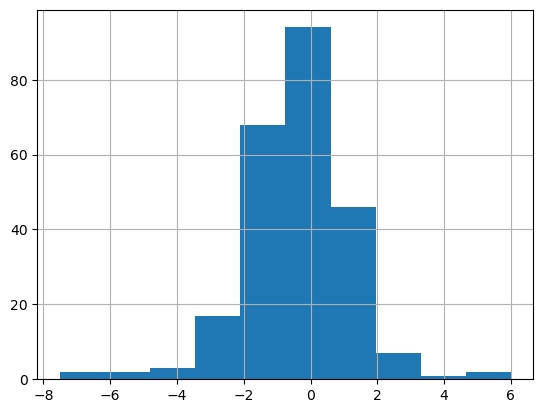

NUTRIENT_RICH_FOODS_INDEX_2wkAverage


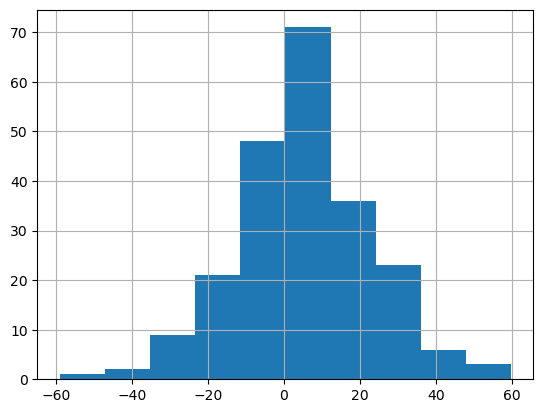

ANTINUTRIENT_DENSITY_2wkAverage


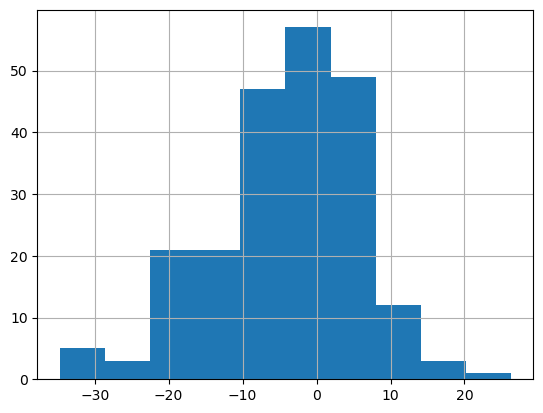

total_calorie


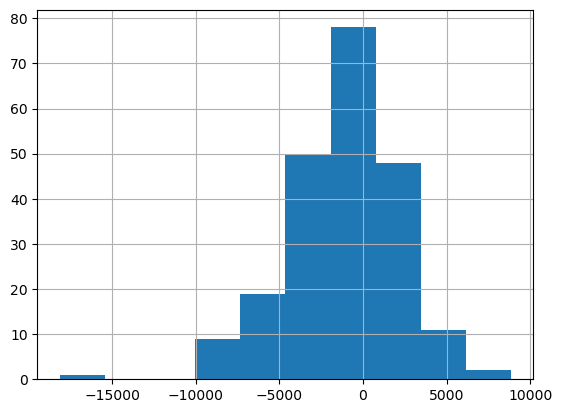

In [15]:
for omc in dev_cv_analysis.outcome_measures.columns:
    if omc=='SID': continue
    print(omc)
    dev_cv_analysis.outcome_measures[omc].hist()
    plt.show()

That's an odd outlier for total_calorie and ANTINUTRIENT_DENSITY_2wkAverage. can we break these down into the pre- and post- to see what happened?

In [16]:
raw_data_by_wave = pd.read_csv(dev_cv_analysis.data_by_wave_ppt_path)

In [19]:
raw_data_by_wave.time_period.value_counts()

baseline    259
1wkpost     230
3mopost     220
6mopost     214
12mopost    171
Name: time_period, dtype: int64

In [20]:
var_to_check = 'ANTINUTRIENT_DENSITY_2wkAverage' # also check total_calorie

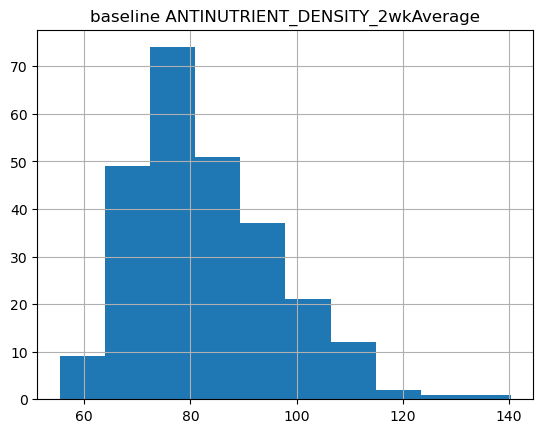

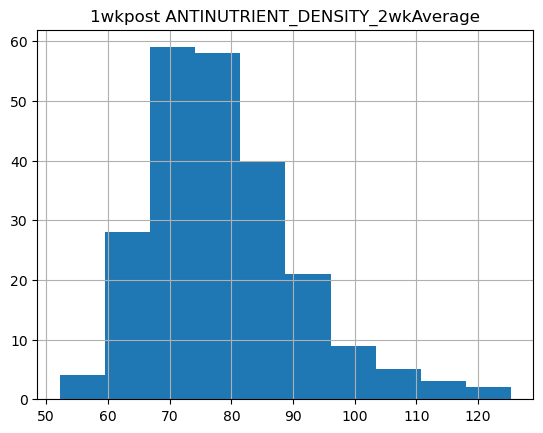

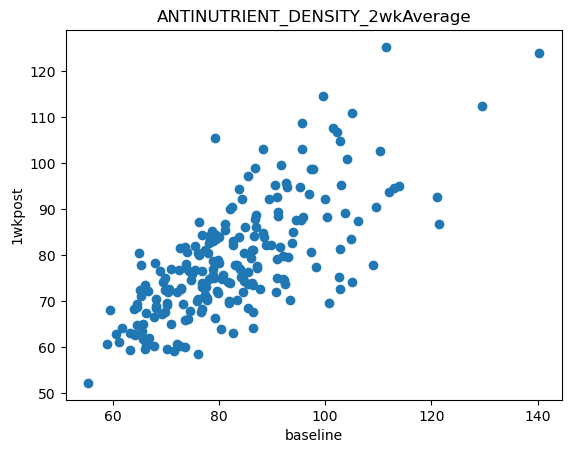

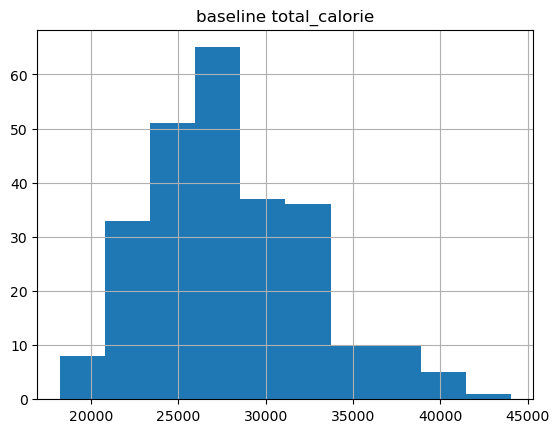

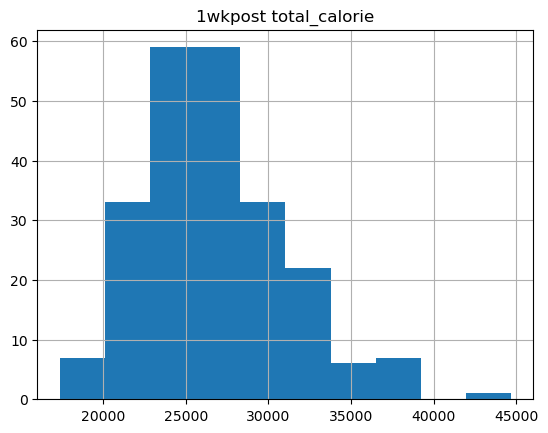

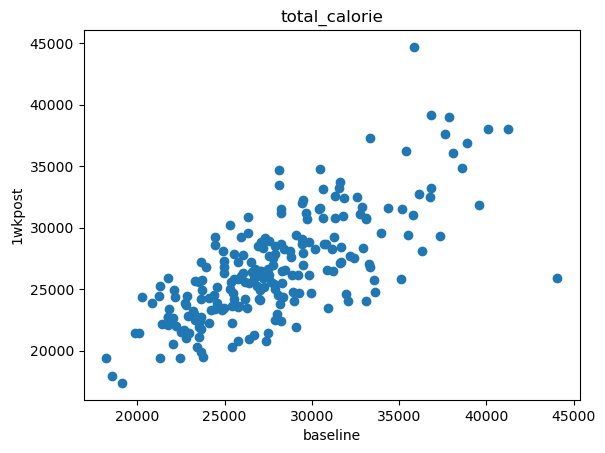

In [27]:
# for the first two time periods (baseline, 1wkpost)
# print the histogram for var_to_check

for var_to_check in ['ANTINUTRIENT_DENSITY_2wkAverage','total_calorie']:
    for tp in ['baseline','1wkpost']:
        raw_data_by_wave[raw_data_by_wave.time_period==tp][var_to_check].hist()
        plt.title(tp + " " + var_to_check)
        plt.show()

    #get a subset of the data with teh two time periods and the variable to check, along with the SID
    scatter_data_long = raw_data_by_wave[raw_data_by_wave.time_period.isin(['baseline','1wkpost'])][['SID','time_period',var_to_check]]
    #now pivot the data so that each SID is a row, and there is a column for each time period
    scatter_data_wide = scatter_data_long.pivot(index='SID',columns='time_period',values=var_to_check)
    #remove any rows with missing data
    scatter_data_wide = scatter_data_wide.dropna()
    #now do scatterplot plotting the two time periods against each other
    #also label the axes
    x_vals = scatter_data_wide['baseline']
    y_vals = scatter_data_wide['1wkpost']
    #add a descriptive title, too
    plt.scatter(x_vals,y_vals)
    plt.title(var_to_check)
    plt.xlabel('baseline')
    plt.ylabel('1wkpost')
    plt.show()
    


OK, there's just a couple of outliers. On the one hand, it wouldn't make much difference. On the other hand, it would be interesting to why they're outlying--are they derived from obvious data entry inputs? It seems unlikely, because the data was multi-choice. Overall, I think in the interests of time, because these limited number of outliers are unlikely to make much difference for the overall r^2, let's just leave it for now.

## Variance of predictor variables

In [39]:
import seaborn as sns
# do a facet grid  of histograms of the predictor variables



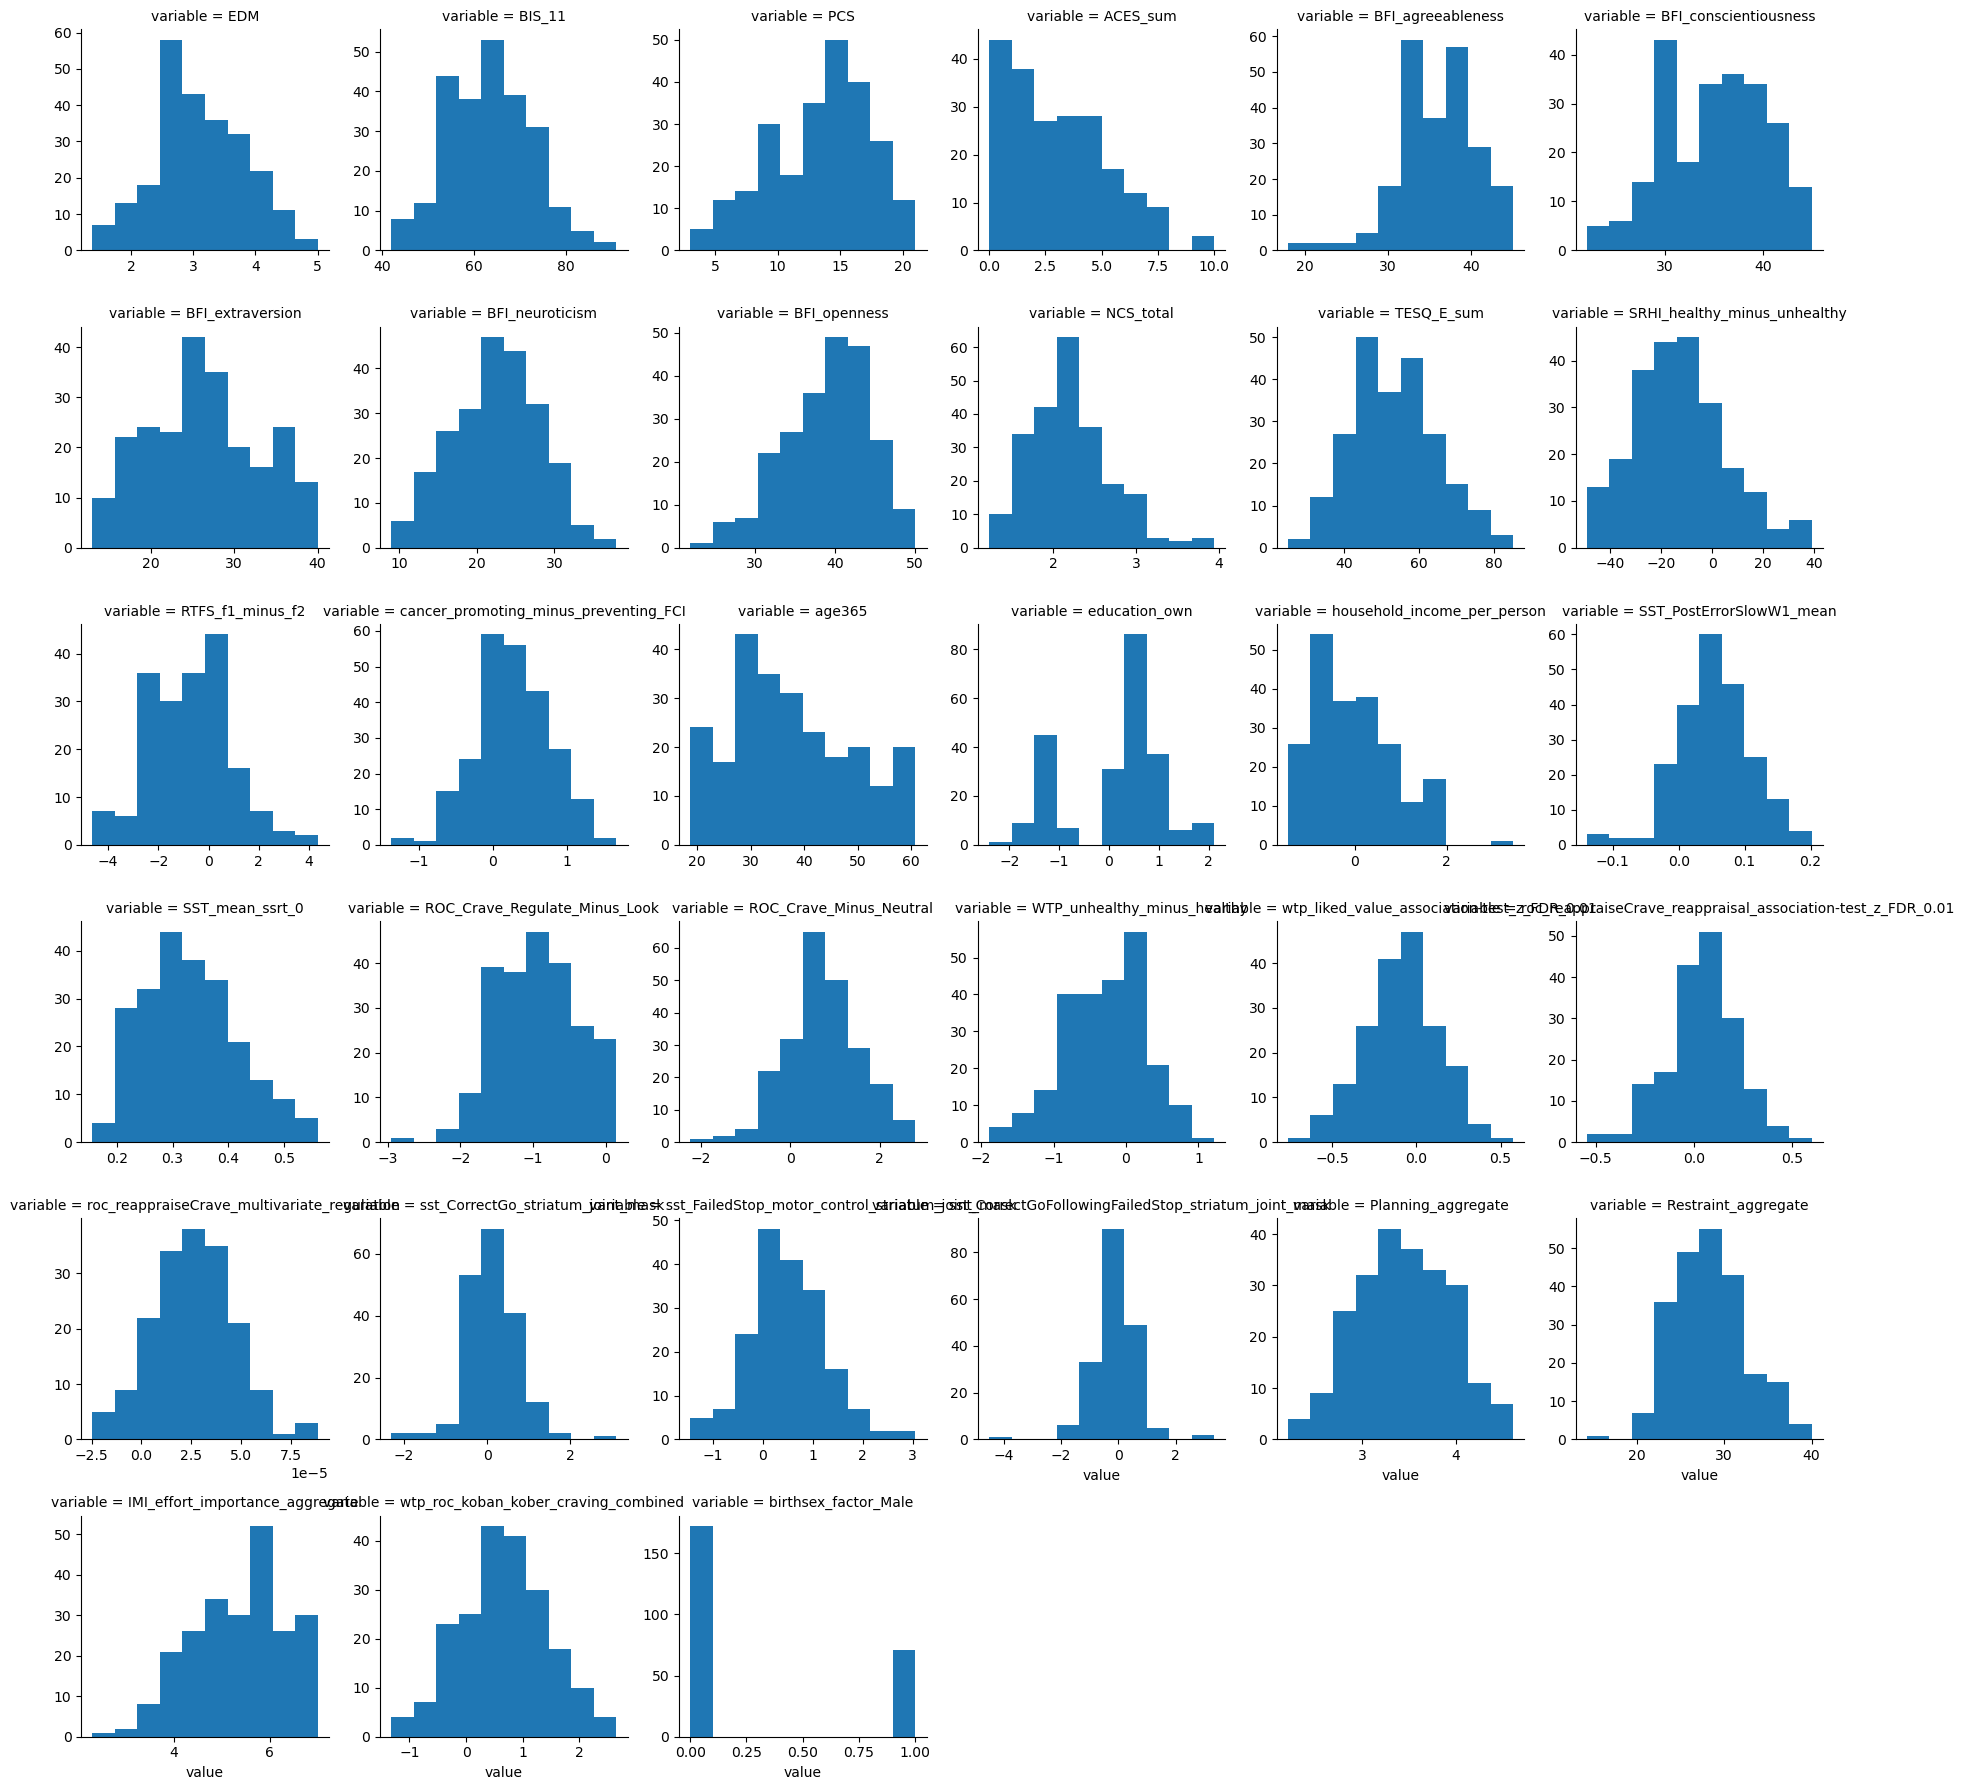

In [38]:
#get raw predictor data

main_predictors = dev_cv_analysis.get_main_predictor_data()
# do a facet grid showing histograms of all the distributiosn of main_predictors

main_predictors_long = pd.melt(main_predictors)

#now create teh facet grid from main_predictors_long
#use variable scaled x axes
g = sns.FacetGrid(main_predictors_long,col='variable',col_wrap=6,sharex=False, sharey=False)
g.map(plt.hist,'value')
plt.show()


In [41]:
dev_cv_analysis.get_predictor_data()['education_own']

0     -1.278210
1     -1.278210
2     -1.278210
3     -0.148899
4     -0.713554
         ...   
238    0.415757
239    0.415757
240    0.415757
241   -1.842866
242    2.109723
Name: education_own, Length: 243, dtype: float64

The onlything that's odd is education, which is bimodally distributed. Might as well have a look.

In [43]:
data_by_ppt = pd.read_csv(dev_cv_analysis.data_by_ppt_path)

<AxesSubplot: >

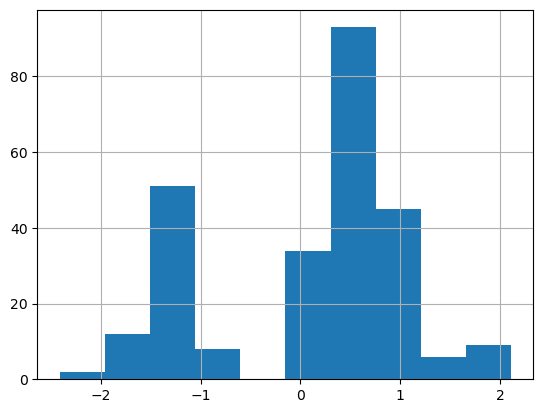

In [47]:
data_by_ppt.education_own.hist()

OK, we need to go further back to the raw data.

Looking at the raw data, it's probably fine. It will arise because the levels of education are:

 - No schooling completed
 - Elementary school to 8th grade
- Some high school, no diploma
- High school diploma or GED
- Some college credit, no degree
- Trade, technical or vocational training
- Associate's degree
- Bachelor's degree
- Master's degree
- Professional degree
- Doctoral degree
- Other (please fill in textbox)
- Decline to respond

There are few subjects who have trade/vocational training or an associate's degree. That's the reason for missing values. Bachelor's degree is the most common, and there are very few subjects with vocational, trade, or technical training, which explains the gap.